Code with online Retail **dataset**

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load Data
file_path = "Online Retail.xlsx"
df = pd.read_excel(file_path, sheet_name="Online Retail")

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
Country,541909,38,United Kingdom,495478


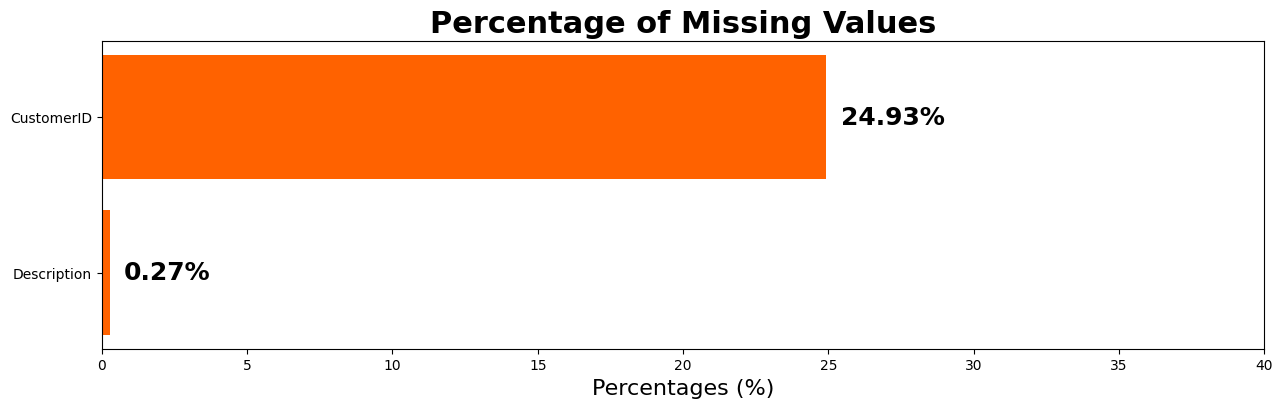

In [ ]:
# Calculating the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100

missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')
ax.set_xlim([0, 40])
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

In [ ]:
# Removing rows with missing values
df = df.dropna(subset=['CustomerID', 'Description'])

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
# duplicate
duplicate_rows = df[df.duplicated(keep=False)]

# Sorting the data
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])
duplicate_rows_sorted.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom


In [ ]:
# Displaying the number of duplicate rows
print(f"The dataset contains {df.duplicated().sum()} duplicate rows that need to be removed.")

# Removing duplicate rows
df.drop_duplicates(inplace=True)

The dataset contains 5225 duplicate rows that need to be removed.


In [ ]:
# Total Data Left
df.shape[0]

401604

In [ ]:
# Filter Cancelled Transactions
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

# Analyze the characteristics of these rows
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancelled_transactions.describe().drop('CustomerID', axis=1)

,Quantity,InvoiceDate,UnitPrice
count,8872.000000,8872,8872.000000
mean,-30.774910,2011-06-27 09:06:05.024797184,18.899512
min,-80995.000000,2010-12-01 09:41:00,0.010000
25%,-6.000000,2011-03-23 11:23:45,1.450000
50%,-2.000000,2011-07-11 13:51:00,2.950000
75%,-1.000000,2011-10-06 20:36:00,4.950000
max,-1.000000,2011-12-09 11:58:00,38970.000000
std,1172.249902,NaN,445.190864


In [ ]:
# Finding the percentage of cancelled transactions
cancelled_percentage = (cancelled_transactions.shape[0] / df.shape[0]) * 100
print(f"The percentage of cancelled transactions in the dataset is: {cancelled_percentage:.2f}%")

The percentage of cancelled transactions in the dataset is: 2.21%


In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,Completed
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,Completed
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,Completed
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,Completed
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,Completed


In [ ]:
# Group by CustomerID, StockCode, and Description
purchase_summary = (
    df.groupby(['CustomerID', 'StockCode', 'Description'])
    .agg(
        TimesPurchased=('InvoiceNo', 'nunique'),
        TotalQuantity=('Quantity', 'sum')
    )
    .reset_index()
)

# Filter to show only repeat purchases
repeat_purchases = purchase_summary[purchase_summary['TimesPurchased'] > 2]

# Sort for better readability
repeat_purchases = repeat_purchases.sort_values(by=['CustomerID', 'TimesPurchased'], ascending=[True, False])

# Save the full result to CSV
repeat_purchases.to_csv("repeat_customer_purchases.csv", index=False)

# Display top 20 rows
print("Top 20 Customer Purchase Summary (Products bought more than once):")
print(repeat_purchases.head(20).to_string(index=False))
print(f"\nTotal number of repeat purchase entries: {len(repeat_purchases)}")


Top 20 Customer Purchase Summary (Products bought more than once):
 CustomerID StockCode                        Description  TimesPurchased  TotalQuantity
    12347.0     22375  AIRLINE BAG VINTAGE JET SET BROWN               6             28
    12347.0     21731      RED TOADSTOOL LED NIGHT LIGHT               5             72
    12347.0     22727          ALARM CLOCK BAKELIKE RED                5             36
    12347.0    84558A       3D DOG PICTURE PLAYING CARDS               5            126
    12347.0     20719             WOODLAND CHARLOTTE BAG               4             40
    12347.0     22196       SMALL HEART MEASURING SPOONS               4             72
    12347.0     22371       AIRLINE BAG VINTAGE TOKYO 78               4             32
    12347.0     22423           REGENCY CAKESTAND 3 TIER               4             15
    12347.0     22725     ALARM CLOCK BAKELIKE CHOCOLATE               4             20
    12347.0     21791 VINTAGE HEADS AND TAILS CARD GA

In [ ]:
# Creating dummy email for notification
df['Email'] = df['CustomerID'].apply(lambda x: f"customer{x:.0f}@example.com")

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,Email
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,customer17850@example.com
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,customer17850@example.com
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,customer17850@example.com
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,customer17850@example.com
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,customer17850@example.com
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,Completed,customer17850@example.com
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,Completed,customer17850@example.com
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,Completed,customer17850@example.com
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,Completed,customer17850@example.com
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,Completed,customer13047@example.com


In [ ]:
# Load the repeated purchase data
repeat_purchases = pd.read_csv("repeat_customer_purchases.csv")

# Add simulated email column (for demonstration)
repeat_purchases['Email'] = repeat_purchases['CustomerID'].apply(lambda x: f"customer{x:.0f}@example.com")

# Eg This product currently on sale
sale_product = {
    'StockCode': '85123A',
    'Description': 'WHITE HANGING HEART T-LIGHT HOLDER'
}

# Function to find similar products
def find_similar_products(description, df):
    keywords = set(description.lower().split())
    return df[df['Description'].apply(lambda x: len(keywords.intersection(set(str(x).lower().split()))) > 0)]

# Filter similar products from customer list
similar_products_df = find_similar_products(sale_product['Description'], repeat_purchases)

# Trigger notification
print("🔔 Sending notifications for product on sale...\n")
notify_customers(similar_products_df)

# Notify customers
def notify_customers(df):
    notified_emails = set()
    for _, row in df.iterrows():
        email = row['Email']
        if email not in notified_emails:
            print(f"📧 Notification sent to {email} about a sale on a product similar to: '{row['Description']}'")
            notified_emails.add(email)

# Print the total number of notification to repeat purchase records
print(f"\nTotal number of repeat purchase entries: {len(similar_products_df)}")


🔔 Sending notifications for product on sale...

📧 Notification sent to customer12347@example.com about a sale on a product similar to: 'SMALL HEART MEASURING SPOONS'
📧 Notification sent to customer12352@example.com about a sale on a product similar to: 'PINK HEART SHAPE EGG FRYING PAN'
📧 Notification sent to customer12359@example.com about a sale on a product similar to: 'WOOD BLACK BOARD ANT WHITE FINISH'
📧 Notification sent to customer12370@example.com about a sale on a product similar to: 'WHITE TALL PORCELAIN T-LIGHT HOLDER'
📧 Notification sent to customer12383@example.com about a sale on a product similar to: 'WHITE WOOD GARDEN PLANT LADDER'
📧 Notification sent to customer12388@example.com about a sale on a product similar to: 'HANGING HEART JAR T-LIGHT HOLDER'
📧 Notification sent to customer12415@example.com about a sale on a product similar to: 'SET 12 KIDS  WHITE CHALK STICKS'
📧 Notification sent to customer12431@example.com about a sale on a product similar to: 'HANGING HEART 